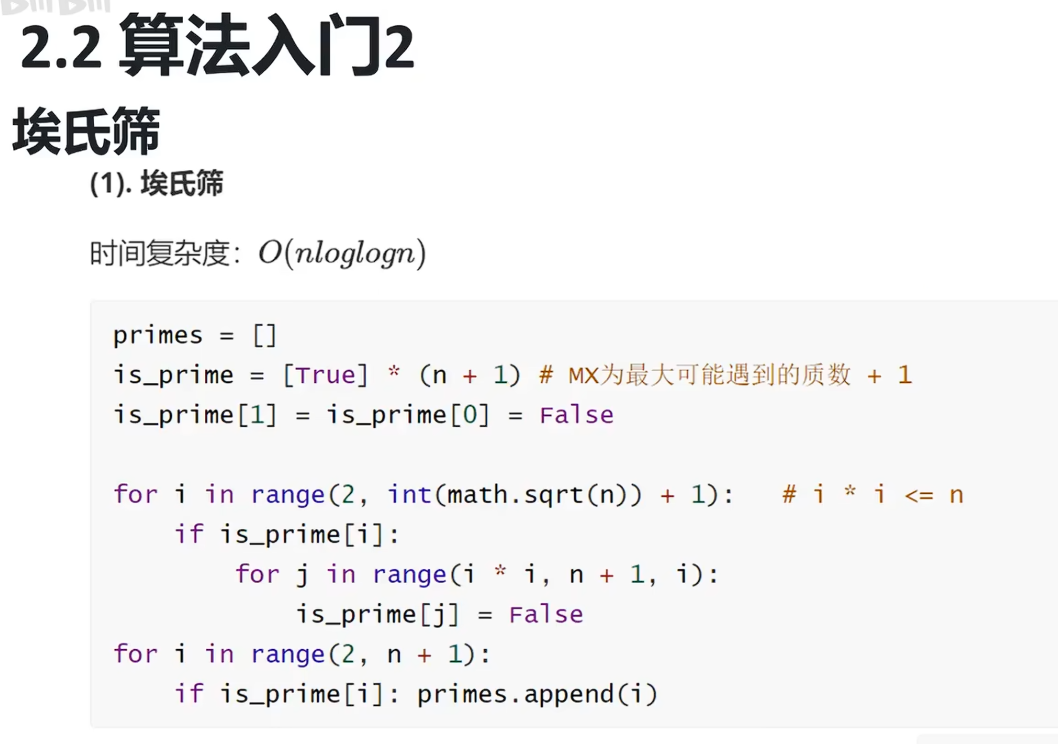

## 核心思想：排除法
**找到一个质数，排除掉所有该质数的倍数**
1.先假设所有的数都是质数（全部标记为true）

2.从2开始遍历，如果当前数是质数，那么排除掉所有该质数的倍数（标记为false）

3.找下一个没被划掉的数，比如下一个数是3（重复第二步，排除该数的质数的倍数）

4.继续重复这一过程，最后没被划掉的数就是质数

# 埃氏筛

In [20]:
# 初始化空列表
from math import sqrt


n = 10000
prime = []
# 先标记全部数为质数，n+1是为了方便索引表示
is_prime = [True] * (n + 1)
# 0和1不是质数，单独标记为False
is_prime[1] = is_prime[0] = False
# 从2开始遍历到n
for i in range(2,int(sqrt(n) + 1)):
    if is_prime[i]:
        for j in range(i * i,n + 1,i):
            is_prime[j] = False
for i in range(2, n+1):
    if is_prime[i]:
        prime.append(i)
print(prime)


[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

In [27]:
def brute_force_primes(n):
    """返回从 2 到 n 的所有质数（最笨的暴力循环，不做任何优化）"""
    primes = []
    x = 2
    while x <= n:
        is_prime = True
        d = 2
        while d < x:
            if x % d == 0:
                is_prime = False
            d += 1
        if is_prime:
            primes.append(x)
        x += 1
    return primes

# 示例
print(brute_force_primes(10000))


[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

In [26]:
def isPrime(n):
    if n <= 1:
        return False
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return False
    return True

for num in range(1, 10001):
    if isPrime(num):
        print(num)




2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
211
223
227
229
233
239
241
251
257
263
269
271
277
281
283
293
307
311
313
317
331
337
347
349
353
359
367
373
379
383
389
397
401
409
419
421
431
433
439
443
449
457
461
463
467
479
487
491
499
503
509
521
523
541
547
557
563
569
571
577
587
593
599
601
607
613
617
619
631
641
643
647
653
659
661
673
677
683
691
701
709
719
727
733
739
743
751
757
761
769
773
787
797
809
811
821
823
827
829
839
853
857
859
863
877
881
883
887
907
911
919
929
937
941
947
953
967
971
977
983
991
997
1009
1013
1019
1021
1031
1033
1039
1049
1051
1061
1063
1069
1087
1091
1093
1097
1103
1109
1117
1123
1129
1151
1153
1163
1171
1181
1187
1193
1201
1213
1217
1223
1229
1231
1237
1249
1259
1277
1279
1283
1289
1291
1297
1301
1303
1307
1319
1321
1327
1361
1367
1373
1381
1399
1409
1423
1427
1429
1433
1439
1447
1451
1453
1459
1471
1481
1483
1487
1489
1493
1499
15